In [73]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import cv2
import pickle

In [76]:
data = []
annote = pd.read_pickle('./annotations/raw/aDN_Control/1/df3d_result__Users_fassbendert_uzk_project_data_aDN_Control_1.pkl')
pic = cv2.imread('./example_images/aDN_Control/camera_0_img_0.jpg')
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
height, width, _ = pic.shape

dict_keys([0, 1, 2, 3, 4, 5, 6, 'points3d', 'points2d', 'points3d_wo_procrustes', 'camera_ordering', 'heatmap_confidence'])
(7, 900, 38, 2)
(38, 2)


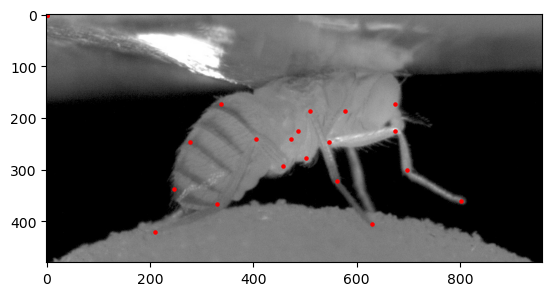

In [79]:
data = []
annote = pd.read_pickle('./annotations/raw/aDN_Control/1/df3d_result__Users_fassbendert_uzk_project_data_aDN_Control_1.pkl')
pic = cv2.imread('./example_images/aDN_Control/camera_0_img_0.jpg')
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
height, width, _ = pic.shape
print(annote.keys())
print(annote['points2d'].shape)
annotation = annote['points2d'][0, 0, :, :]
print(annotation.shape)
plt.imshow(pic)
plt.scatter( annotation[:, 1] * width, annotation[:, 0]* height, c='r', s = 5)
plt.show()

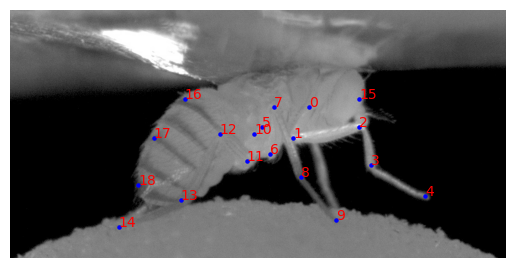

In [80]:
dataset = "aDN_Control"

result_path = f'./annotations/raw/{dataset}/1/df3d_result*.pkl'
pr_path = f'./annotations/raw/{dataset}/1/df3d_result*.pkl'
d = pickle.load(open(glob.glob(pr_path)[0], 'rb'))

image_path = './example_images/{dataset}/camera_{cam_id}_img_{img_id}.jpg'


cam_id, time = 0, 0

plt.imshow(plt.imread(image_path.format(dataset=dataset,cam_id=0,img_id=0)), cmap="grey")
plt.axis('off')
for joint_id in range(19):
    x, y = d['points2d'][cam_id, time][joint_id, 1] * 960, d['points2d'][cam_id, time][joint_id, 0] * 480
    plt.scatter(x, y, c='blue', s=5)
    plt.text(x, y, f'{joint_id}', c='red')

plt.show(block=True)